Task 1 - Data Analysis and Preprocessing

In [15]:
import pandas as pd
import glob
import os

df_creditcard = pd.read_csv('../data/creditcard.csv')
df_fraud_data = pd.read_csv('../data/Fraud_Data.csv')
df_IpAddress = pd.read_csv('../data/IpAddress_to_Country.csv')


print(df_creditcard.head())
print(df_creditcard.info())

df_creditcard.columns

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [16]:
print(df_fraud_data.head())
print(df_fraud_data.info())

df_fraud_data.columns

   user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0  
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          -----

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class'],
      dtype='object')

In [17]:
print(df_IpAddress.head())
print(df_IpAddress.info())

df_IpAddress.columns

   lower_bound_ip_address  upper_bound_ip_address    country
0              16777216.0                16777471  Australia
1              16777472.0                16777727      China
2              16777728.0                16778239      China
3              16778240.0                16779263  Australia
4              16779264.0                16781311      China
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB
None


Index(['lower_bound_ip_address', 'upper_bound_ip_address', 'country'], dtype='object')

Step 1: Handle Missing Values

In [19]:
missing_creditcard = df_creditcard.isnull().sum()
print("Missing values in creditcard dataset:\n", missing_creditcard)

missing_fraud_data = df_fraud_data.isnull().sum()
print("Missing values in Fraud_Data dataset:\n", missing_fraud_data)

missing_ip_address = df_IpAddress.isnull().sum()
print("Missing values in IpAddress_to_Country dataset:\n", missing_ip_address)

Missing values in creditcard dataset:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Missing values in Fraud_Data dataset:
 user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64
Missing values in IpAddress_to_Country dataset:
 lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64


Step 2: Data Cleaning

In [20]:
df_creditcard.drop_duplicates(inplace=True)
df_fraud_data.drop_duplicates(inplace=True)
df_IpAddress.drop_duplicates(inplace=True)

In [21]:
df_fraud_data['signup_time'] = pd.to_datetime(df_fraud_data['signup_time'])
df_fraud_data['purchase_time'] = pd.to_datetime(df_fraud_data['purchase_time'])

print(df_fraud_data[['signup_time', 'purchase_time']].dtypes)

signup_time      datetime64[ns]
purchase_time    datetime64[ns]
dtype: object


Step 3: Exploratory Data Analysis (EDA)

Univariate Analysis

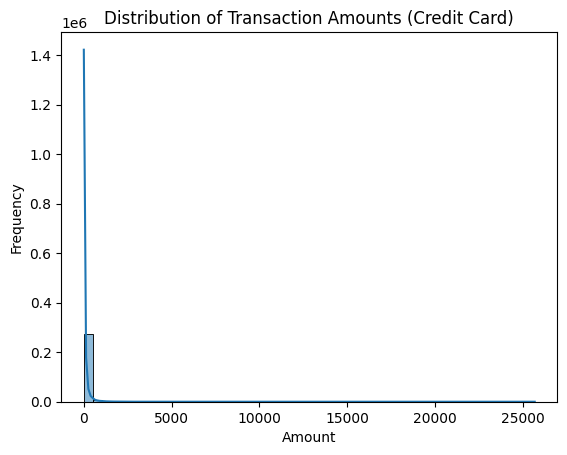

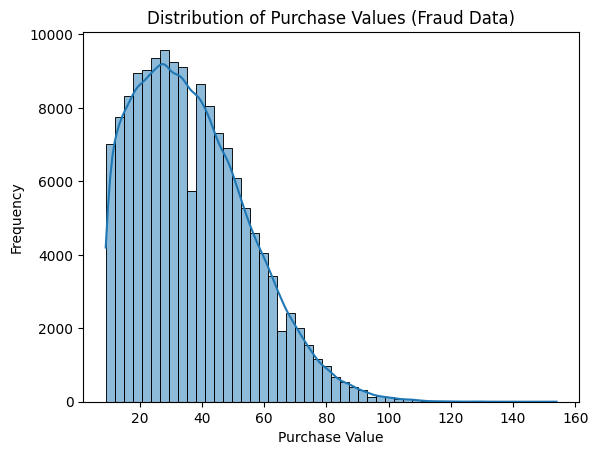

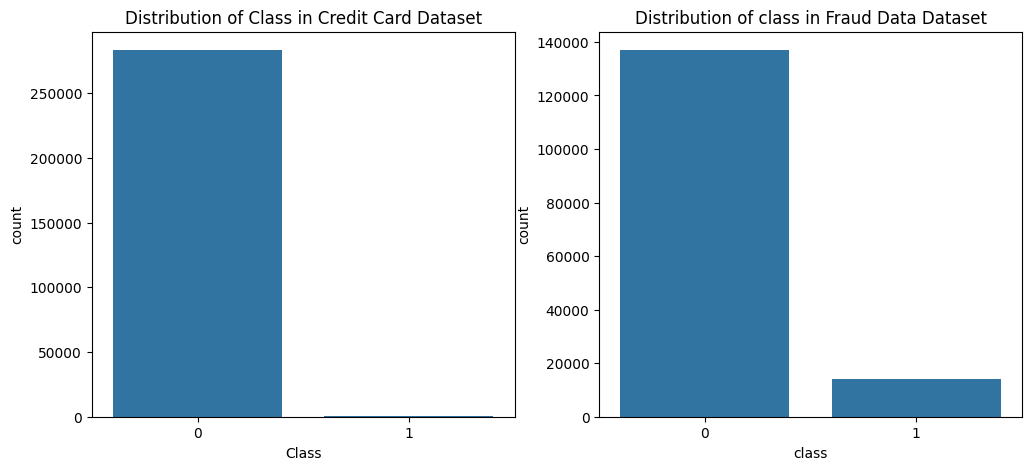

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_creditcard['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts (Credit Card)')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

sns.histplot(df_fraud_data['purchase_value'], bins=50, kde=True)
plt.title('Distribution of Purchase Values (Fraud Data)')
plt.xlabel('Purchase Value')
plt.ylabel('Frequency')
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x='Class', data=df_creditcard, ax=ax[0])
ax[0].set_title('Distribution of Class in Credit Card Dataset')
sns.countplot(x='class', data=df_fraud_data, ax=ax[1])
ax[1].set_title('Distribution of class in Fraud Data Dataset')
plt.show()

In [24]:
print("Credit Card Dataset Analysis:")
print("\nAmount Column Statistics:")
print(df_creditcard['Amount'].describe())

print("\nClass Column Statistics:")
print(df_creditcard['Class'].value_counts(normalize=True))

Credit Card Dataset Analysis:

Amount Column Statistics:
count    283726.000000
mean         88.472687
std         250.399437
min           0.000000
25%           5.600000
50%          22.000000
75%          77.510000
max       25691.160000
Name: Amount, dtype: float64

Class Column Statistics:
Class
0    0.998333
1    0.001667
Name: proportion, dtype: float64


In [26]:
print("\n\nFraud Data Dataset Analysis:")
print("\npurchase_value Column Statistics:")
print(df_fraud_data['purchase_value'].describe())

print("\nclass Column Statistics:")
print(df_fraud_data['class'].value_counts(normalize=True))

print("\nAdditional Metrics:")
print(f"\nCredit Card Mean Amount: ${df_creditcard['Amount'].mean():.2f}")
print(f"Fraud Data Mean Purchase Value: ${df_fraud_data['purchase_value'].mean():.2f}")

print("\nSkewness and Kurtosis:")
print(f"Credit Card Amount Skewness: {df_creditcard['Amount'].skew():.2f}")
print(f"Fraud Data purchase_value Skurtosis: {df_fraud_data['purchase_value'].kurtosis():.2f}")

print("\nInterquartile Range:")
print(f"Credit Card Amount IQR: {df_creditcard['Amount'].quantile(0.75) - df_creditcard['Amount'].quantile(0.25):.2f}")
print(f"Fraud Data purchase_value IQR: {df_fraud_data['purchase_value'].quantile(0.75) - df_fraud_data['purchase_value'].quantile(0.25):.2f}")



Fraud Data Dataset Analysis:

purchase_value Column Statistics:
count    151112.000000
mean         36.935372
std          18.322762
min           9.000000
25%          22.000000
50%          35.000000
75%          49.000000
max         154.000000
Name: purchase_value, dtype: float64

class Column Statistics:
class
0    0.906354
1    0.093646
Name: proportion, dtype: float64

Additional Metrics:

Credit Card Mean Amount: $88.47
Fraud Data Mean Purchase Value: $36.94

Skewness and Kurtosis:
Credit Card Amount Skewness: 16.98
Fraud Data purchase_value Skurtosis: 0.14

Interquartile Range:
Credit Card Amount IQR: 71.91
Fraud Data purchase_value IQR: 27.00
